在上次实验中我们训练了一个线性回归模型，接下来这个实验我们使用我们将使用随机梯度下降算法对糖尿病数据集进行logistic回归模型训练。
  
第一步导入数据，我们将数据放到文件夹DataSet中pima-indians-diabetes.csv中。

In [1]:
from csv import reader  #导入读取数据的包
import random
import numpy as np
filename = "pima-indians-diabetes.csv" #文件路径
data = list()
with open(filename,'r') as file:
    data_reader = reader(file)  #创建文件读取器
    for row in data_reader:    #按行读取
        if not row:        
            continue
        data.append(row)        #将读取到的行数添加到data中

在上面我们读取了数据，接下来我们输出数据的前五行。

In [2]:
data[:5]

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'],
 ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1']]

可以看出每一行数据包含8个特征，1个标签。各个特征含义如下：
#1 怀孕次数 
#2 口服葡萄糖耐量试验中血浆葡萄糖浓度 
#3 舒张压（mm Hg） 
#4 三头肌组织褶厚度（mm）
#5 2小时血清胰岛素（μU/ ml）
#6 体重指数（kg/（身高(m)）^ 2） 
#7 糖尿病系统功能
#8 年龄（岁）
#label 是否患有糖尿病
由于每行数据都是字符串形式，我们需要将其转换为float格式。

**任务一：**将获取的数据集中的数据类型由str转换为float

In [3]:
for i in range(len(data[0])):
    for row in data:
        ### START THE CODE
        row[i] = float(row[i].strip())
        ### END THE CODE

接下来我们来看转换后的数据。

In [4]:
data[:5]

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]]

输出：  
[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]]

此时我们看到所有的数据都已经是float格式。

**任务二：**找出数据集每个特征的最大值和最小值

在进行实验前，我们需要对数据进行一些处理。找出每个特征的的最大值和最小值，将其存储到min_max中。定义函数Select_min_max。其中min_max[i]代表第i个特征的最小值和最大值对。  
作用：计算出每个特征数据的最大值以及最小值。  
参数：预处理的数据集  
返回：最大和最小值对数组

In [5]:
 def Select_min_max(dataset):
        min_max = list()
        for i in range(len(dataset[0])):                 #遍历每一列
            ### START THE CODE ###
            select_row=[]
            for j in range(len(dataset)):                #获取每一行数据中第i个特征数据
                select_row.append(dataset[j][i])         #计算i个特征中最小值
            min_value=min(select_row)                    #计算第i个特征中的最大值
            max_value=max(select_row)                                       
            ### END THE CODE ###
            min_max.append([min_value,max_value])        #将第i个特征中的最大值和最小值【min，max】添加至min_max中
        return min_max                                   #将min_max返回

In [6]:
min_max = Select_min_max(data)
print ("min_max = ", min_max)

min_max =  [[0.0, 17.0], [0.0, 199.0], [0.0, 122.0], [0.0, 99.0], [0.0, 846.0], [0.0, 67.1], [0.078, 2.42], [21.0, 81.0], [0.0, 1.0]]


输出：  
min_max =  [[0.0, 17.0], [0.0, 199.0], [0.0, 122.0], [0.0, 99.0], [0.0, 846.0], [0.0, 67.1], [0.078, 2.42], [21.0, 81.0], [0.0, 1.0]]

**任务三：**对数据进行归一化处理

接下来对数据进行归一化处理，定义函数N_dataset，根据如下公式进行归一化处理：
$$row[i] = \frac{row[i]-min\_max[i][0]}{min\_max[i][1]-min\_max[i][0]}$$
其中row[i]代表row行数据中的第i个特征，min_max[i][0]代表第i个特征中的最小值，min_max[i][1]代表第i个特征中的最大值。  
作用：对数据进行归一化处理  
参数：  
dataset：原始数据集  
min_max：min_max对  
返回：进行归一化后的数据

In [7]:
def N_dataset(data,min_max):
    for row in data:                 #依次遍历每一行数据
        for i in range(len(row)):    #依次处理该行没一个特征 
            ### START THE CODE ###
            row[i]=(row[i]-min_max[i][0])/(min_max[i][1]-min_max[i][0])  #归一化操作
            ### END THE CODE ###

In [8]:
N_dataset(data,min_max)
print ("data[:1] = ", data[:1])

data[:1] =  [[0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334, 1.0]]


输出：  
data[:1] =  [[0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334, 1.0]]

构建k个交叉验证集  
目的：在实际训练中，模型通常比训练数据好，但是对训练之外的数据拟合程度差。用于评价模型的泛化能力，从而进行模型选择。  
  
交叉验证的基本思想：在某种意义下将原始数据进行分组，一部分做为训练数据，另一部分做为验证集，首先用训练集对模型进行训练，再利用验证集来测试模型的泛化误差。另外，现实中数据总是有限的，为了对数据形成重用，从而提出k-折叠交叉验证。

In [9]:
# 函数功能：将数据集划分为k个交叉验证集
# dataset：待划分的数据集
# k 交叉验证集的个数
# return:已经划分好的数据
def separate_data(dataset,k):
    data_separate = list()
    data_copy = list(dataset)         #将dataset保存
    separate_size = (len(dataset)) / (k) #每一个验证集的大小
    for i in range(k):
        fold = list()
        while (len(fold) < round(separate_size)) and (len(data_copy) !=0): #验证集
            index = random.randint(0,len(data_copy)-1)                #随机从data_copy中取出一个元素
            fold.append(data_copy.pop(index))                               #将该元素添加至第i个验证集中
        data_separate.append(fold)                                          #将该验证集组成完整的数据集
    return data_separate                                              #返回完整的数据集

In [10]:
s_data = separate_data(data,4)
s_data[0][:1]

[[0.17647058823529413,
  0.8542713567839196,
  0.5245901639344263,
  0.37373737373737376,
  0.26595744680851063,
  0.5141579731743666,
  0.11870196413321946,
  0.15,
  1.0]]

逻辑回归介绍：  
   在前面线性回归的实验中，处理的因变量都是数值型区间变量，建立的模型描述是因变量的期望与自变量之间的线性关系。在采用回归模型分析实际问题中，所研究的变量往往不全是区间变量而是顺序变量或属性变量，比如二项分布问题。通过分析年龄、性别、体质指数、平均血压、疾病指数等指标，判断一个人是否换糖尿病，Y=0表示未患病，Y=1表示患病，这里的响应变量是一个两点（0-1）分布变量，它就不能用h函数连续的值来预测因变量Y（只能取0或1）。  
  总之，线性回归模型通常是处理因变量是连续变量的问题，如果因变量是定性变量，线性回归模型就不再适用了，需采用逻辑
回归模型解决。  
  逻辑回归（Logistic Regression）是用于处理因变量为分类变量的回归问题，常见的是二分类或二项分布问题，也可以处理多分类问题，它实际上是属于一种分类方法。二分类问题的概率与自变量之间的关系图形往往是一个S型曲线。如下图所示：
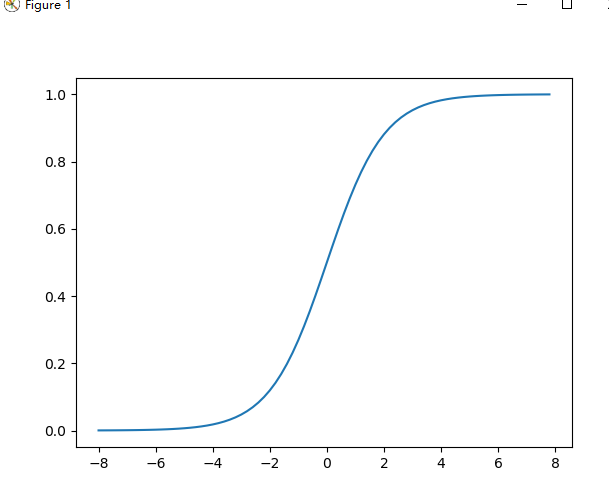
    这里我们将该函数定义如下：
    $$f(x) = \frac{1}{1+e^{-z}}$$
    函数的定义域为全体实数，值域在[0,1]之间，x轴在0点对应的结果为0.5。当x取值足够大的时候，可以看成0或1两类问题，大于0.5可以认为是1类问题，反之是0类问题，而刚好是0.5，则可以划分至0类或1类。对于0-1型变量，y=1的概率分布公式定义如下：
    $$P(y=1)=p$$
    y=0的概率分布公式定义如下：
    $$P(y=0)=1-p$$
    其离散型随机变量期望值公式如下：
    $$E(y)=1*p+0*(1-p)=p$$
    采用线性模型进行分析，其公式变换如下：
    $$P(y=1|x)=\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n$$
    而实际应用中，概率p与因变量往往是非线性的，为了解决该类问题，我们引入了logit变换，使得logit(p)与自变量之间存在线性相关的关系，逻辑回归模型定义如下：
    $$logit(p)=In(\frac{p}{1-p})=\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n$$
    通过推导，概率p变换如下，这与Sigmoid函数相符，也体现了概率p与因变量之间的非线性关系。以0.5为界限，预测p大于0.5时，我们判断此时y更可能为1，否则y为0。
    $$P=\frac{1}{1+e^{-(\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n)}}$$
    得到所需的Sigmoid函数后，接下来只需要和前面的线性回归一样，拟合出该式中n个参数θ即可。

第一步是开发一个可以进行预测的函数，在随机梯度下降中估计系数系数值以及最终确定后再测试集上进行预测都需要这个预测函数。  
下面是一个名为predict()的函数，给定一组系数，它预测每一行的输出值。  

预测函数：predicted（data,weights,b）(也就是加权求和，在计算sigmoid值）  
作用:对数据进行加权求和求出ans，在对ans进行sigmoid函数求值  
参数：  
data：输入的数据(每行数据最后一位为标签）  
weights：权值  
偏置：b  
返回：Sigmoid(ans)  
使用矢量化操作

**任务四：**参数和特征向量加权求和。

In [11]:
def predict(data,weights,b):
    Weights = np.array(weights)
    
    ### START THE CODE ###
    data = np.array(data)
    X = data[:,:len(data[0])-1]  #获取数据的数值部分，不包括标签。
    yhat = b + X.dot(Weights)    #计算Weights*Data+b
    ### END THE CODE ###
    
    try:
       ans = np.exp(-yhat)
    except OverflowError:
        ans = float('inf')
    return (1.0 / (1.0 + ans))                    #返回求出的值        

可以使用先前准备的系数对该数据集进行预测。  
dataset =  
[[2.7810836,2.550537003,0],   
[1.465489372,2.362125076,0],   
[3.396561688,4.400293529,0],   
[1.38807019,1.850220317,0],   
[3.06407232,3.005305973,0],   
[7.627531214,2.759262235,1]]   
wht =  [-0.406605464, 0.852573316, -1.104746259]   
有两个输入值（X1和X2）和三个系数（b0,b1和b2），该模型的预测方程为：

$$y=\frac{1.0}{1.0+e^{-(b_0+b_1*X_1+b_2*X_2)}}$$

In [12]:
dataset =[[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1]]
wht = [0.852573316, -1.104746259]
b = -0.406605464
yhat = predict(dataset,wht,b)
dataset = np.array(dataset)
print("predicted = ",np.around(yhat))

predicted =  [0. 0. 0. 0. 0. 1.]


输出：  
predicted =  [ 0.  0.  0.  0.  0.  1.]

随机梯度下降：  
逻辑回归cost函数形式如下：
$$J(\theta)=-\frac{1}{m}\sum_1^m[y^ilog(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$
各个变量的含义：  
$x^i$    每个样本数据点在某一个特征上的值  
$y^i$    每个样本数据的所属类别标签  
m 样本个数  
$h_\theta(x)$ 样本数据的概率密度函数，即某个数据属于1类（二分类问题）的概率  
$J_\theta$ 代价函数，估计样本属于某类的风险程度，越小越有可能代表这类。   

我们的目标是求出θ，使得这个代价函数J(θ)的值最小，这里就需要用到梯度下降算法。 对于一个函数，我们要找它的最小值，有多种算法，这里我们选择比较容易用代码实现和符合机器学习步骤的梯度下降算法。先来看看梯度下降算法中，自变量的迭代过程。表示如式子（1）所示：
$$（1） \theta_j=\theta_j-\alpha*\frac{\partial(J_\theta)}{\theta_j},(j=0,1,2,...n)$$
可以看到，这是一个θ值不断迭代的过程，其中α是学习速率，就是θ的移动“步幅”，后面的偏导数数就是梯度，可以理解为cost函数在θ当前位置，对于j位置特征的下降速度。对于二维空间，梯度可以理解为函数图像的切线斜率。即：特征是一维的 对于多维特征，cost函数的图像就应该是这样的，如下图所示。
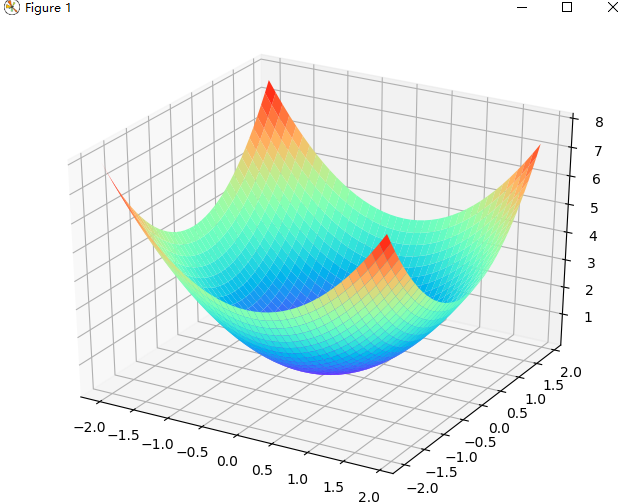  
这是一个二维特征的cost函数的图像，这个时候，梯度有无限多个，我们不能只说cost函数的梯度，应该说，cost函数在某个方向上的梯度。例如，cost函数在$\theta_0$方向上，在($\theta_0=m,\theta_1=n$)上的梯度就是cost函数与$\theta_1=n$这个平面的交线在（m,n）处的斜率。 上面的描述比较抽象，简单说来，假设图像就是一个小山坡（有点像吧），你站在图像的（m,n）点处，朝$\theta_0$的方向看过去，看到的“山坡”的“坡度”就是上面所说的梯度了。

根据cos函数实现梯度下降
$$J(\theta)=-\frac{1}{m}\sum_1^m[y^ilog(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$
用g(z)替换$h_\theta(x^i)$

在随机梯度下降，我们每一步都进行梯度更新,m=1.

$$\frac{\partial{J(\theta)}}{\theta_j}=(g(z)-y^i)*x^i$$

所以梯度更新公式变为：
$$\theta_{j+1}=\theta_j-\alpha*(g(z)-y^i)*x^i$$

**任务五：**利用随机梯度下降算法对参数进行更新

我们已经知道逻辑回归梯度更新的算法，现在我们就来实现一个随机梯度函数Sgd来估计训练集的系数值。  
随机梯度下降需要两个参数：  
学习速率：用于限制每次迭代时每个系数的校正量  
迭代次数：更新系数前遍历训练数据的次数  

$b_{t+1}=b_t-learin\_rate*(g(z)-y)$

$\theta_j$更新方式：
$\theta_{j+1}=\theta_j-learning\_rate*(g(z)-y^i)*x^i$  

接下来我们就来实现Sgd函数。
作用：利用随机梯度下降实现参数更新  
参数：  
dataset：数据集  
l_rate:学习率  
n_epoch：迭代次数  
返回：更新后的参数

函数中有两层循环：  
1 每次迭代的循环  
2 每次迭代的训练集数据的每一行循环  

在每一次迭代中，我们更新训练集中每一行数据的每个系数.

In [13]:
def Test_Sgd(train,l_rate,n_epoch):
    weights = np.zeros((1,len(train[0])-1))[0]    #测试时weights初始化为0
    b = 0

    for epoch in range(n_epoch):              
        for i in range(len(train)):               #利用随机梯度下降更新。
            app = []
            app.append(train[i])
            pred = predict(app,weights,b)
            
            ### START THE CODE ###
            Train = np.array(train)
            b = b - l_rate*(pred-Train[i,2]) #按照梯度更新 更新偏置b
            weights = weights - l_rate * (pred - Train[i,2]) * Train[i, :len(train[0])-1] #按照梯度更新， 更新weights
            ### END THE CODE ###
            
    return weights,b

运行下面的代码，print出最后确定的最优系数。

In [14]:
l_rate = 0.01
n_epoch = 500 
dataset =[[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1]]
weight,b = Test_Sgd(dataset,l_rate,n_epoch)
print("weight = ", weight)
print("b = ", b)

weight =  [ 1.40964903 -2.39091319]
b =  [-0.99333802]


输出：  
weight =  [ 1.40964903 -2.39091319]  
b =  [-0.99333802]

下面的Sgd函数和上面的Test_Sgd(方便做任务)函数一样，只是weigts初始化方式不同。如果你Test_Sgd你完成了，将代码粘贴到Sgd函数中的空白处。

In [15]:
def Sgd(train,l_rate,n_epoch):
    
    weights = np.random.normal(loc=0.0,scale=1,size=len(train[0])-1)
    b = 0

    for epoch in range(n_epoch):              
        for i in range(len(train)):               #利用随机梯度下降更新。
            app = []
            app.append(train[i])
            pred = predict(app,weights,b)
            
            ### START THE CODE ###
            Train = np.array(train)
            b = b - l_rate*(pred-Train[i,2]) #按照梯度更新 更新偏置b
            weights = weights - l_rate * (pred - Train[i,2]) * Train[i, :len(train[0])-1] #按照梯度更新， 更新weights
            ### END THE CODE ###
            
    return weights,b

**任务六：**在训练集上对模型进行训练，并利用测试集进行测试。返回预测后的值。

在前面我们将整个数据集分为k个交叉验证集。在每一个验证集上将数据分为训练集和测试集。在训练集上进行训练，测试集上进行预测。现在我们来定义一个函数，在每一个验证集上对训练集进行训练，调用Sgd获取最后的参数。然后根据参数对测试集进行预测并返回预测结果。

eval函数  
作用：返回对测试集上的预测结果  
参数：  
train 训练数据集  
test  测试数据集    
l_rate 学习率  
n_epoch 迭代次数

返回：在测试集上的预测结果

In [16]:
def eval(train,test,l_rate,n_epoch):
    
    ### START THE CODE ###
    Weight,b = Sgd(train,l_rate,n_epoch)         #训练模型，调用Sgd获得更新后的参数Weights和b
    pred = predict(test,Weight,b)                #对测试数据集进行预测，调用predict。                          
    ### END THE CODE ###
    pred = np.round(pred)
    return pred                  #返回预测值

In [17]:
l_rate = 0.3 
n_epoch = 100 
train = [[2.7810836,2.550537003,0],[1.465489372,2.362125076,0],[3.396561688,4.400293529,0],[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],[7.627531214,2.759262235,1]]
test =   [[5.332441248,12.088626775,1], [6.922596716,1.77106367,1], [8.675418651,-0.242068655,1], [7.673756466,3.508563011,1]] 
pred = eval(train,test,l_rate,n_epoch)
print ("pred = ",pred)

pred =  [0. 1. 1. 1.]


输出： 
pred =  [ 0.  1.  1.  1.]

**任务七：**求出预测值的准确度

在对测试集进行预测之后，我们需要与真实值进行比较。来了解模型的泛化能力。所以我们定义一个accuracy函数，来计算预测值的正确率。在上一步我们得出了pred = [0,1,1,1],现在将其与真实值进行比较，并计算准确率。  
函数accuracy(actual,predicted)  
作用：返回预测的准确度  
参数：  
actual  实际值  
predicted  预测值  
返回：预测的准确率

In [18]:
def accuracy(actual,predicted):
    correct = 0                  #初始化正确个数为0
    for i in range(len(actual)):     #判断每一个例子是否判断正确
        ### STARD THE CODE ###
        if(predicted[i]==actual[i]):
            correct=correct+1                                #相等则加1
        ### END THE CODE ###
    return correct / float(len(actual)) * 100   #将计算的准确率返回

In [19]:
pred = [0,1,1,1]
actual = [row[-1] for row in test]#获取测试集每一行数据最后一个值，也就是真实值
acc = accuracy(actual,pred)
print ("accuracy = %d%%" % acc)

accuracy = 75%


输出：accuracy = 75%

在完成了predict函数、Sgd函数、accuracy函数，现在我们就可以对整个数据集进行一次完整的训练了。  

在对数据集划分为交叉验证集时，我们的参数折交叉验证k设置成4，也就是四个交叉验证集。每一个验证集上都要计算准确度，最后计算平均准确度。  

现在我们定义一个evaluate函数.实验选择学习速率和迭代次数

In [20]:
def evaluate(dataset,l_rate,n_epoch):
    folds = dataset     #获得划分好的交叉验证集
    scores = list()
    for fold in folds:                         #遍历每一个交叉验证集
        train_set = list(folds)                 #将交叉验证集划分为训练集和测试集
        train_set.remove(fold)
        train_set = sum(train_set,[])
        test_set = list()
        for row in fold:                     
            row_copy = list(row)
            test_set.append(row_copy)
        predicted = eval(train_set,test_set,l_rate,n_epoch)   #调用eval函数进行预测
        actual = [row[-1] for row in fold]               #每一个数据的真实标签
        acc = accuracy(actual,predicted)     #计算准确度
        scores.append(acc)                           #每一个交叉验证集的准确度
    return scores                                        #返回所有交叉验证集的准确度

运行下面的代码，你讲看到在每个测试集上的准确度，以及平均准确度。当然你也可以通过修改迭代次数以及学习速率来改进模型。

In [21]:
n_epoch = 1000
l_rate = 0.001
scores = evaluate(s_data,l_rate,n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))

Scores: [44.27083333333333, 46.35416666666667, 41.66666666666667, 53.645833333333336]
Mean Accuracy: 46.484%


在上面我们知道可以利用随机梯度下降算法更新参数，现在我们来学习另一种方法：牛顿法。梯度下降法要求出J对$\theta$的一阶导数，然后逐步更新$\theta$达到局部最优。而牛顿方法要用到一阶导数和二阶导数，牛顿法其实就是求解函数$f(x)=0$的x值，对于初始值点$x_0$,求出函数在该点的切线，然后求出切线与x轴的交点作为新的x值，一直重复这样的步骤直到到达$f(x)=0$的点x。公式如下：
$$X_{n+1} = X_n - \frac{f(X_n)}{f'(X_n)}$$
最小化损失函数
$$J(\theta)=-\frac{1}{m}\sum_1^m[y^ilog(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$
还记得我们是要最小化损失函数J, 我们就要找到使得J达到局部最优的$\theta$，即极小点，在这一点上，J对$\theta$的导数为0, 所以我们要求使得J的一阶导为0的$\theta$。这样，就可以使用牛顿方法来求出这样的$\theta$，而牛顿方法也要算出一阶导来，所以就要对J进行二阶求导，也就是海森矩阵。J对$\theta$的一阶导为：
$$\nabla_{\theta}J={\frac{1}{m}}\sum_{i=1}^m(h_{\theta}(x^i)-y^i)x^i$$
这个看起来跟之前做过的线性回归求导方程是一样的，但是要根据J的表达式一步一步推出来。  
海森矩阵的矢量表达如下：
$$H=\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^i)\left(1-h_\theta(x^i)\right)x^i{(x^i)}^T\right]$$
牛顿方法更新原则：
$$\theta^{(t+1)}=\theta^{(t)}-H^{-1}\nabla_{\theta}J$$

接下来我们就使用牛顿法来求解参数，先定义数据集apple_sugar表示苹果的含糖量，apple_density表示密度。标签0或1表示是差苹果还是好苹果。  
apple_sugar =  [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103]

apple_density = [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
apple_sugar = np.array([0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103])
apple_density = np.array([0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719])
apple_label = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])  #标签数据

将标签数据的维度变化为(1,17)

In [23]:
apple_label.shape = (1,17)
a_label = np.transpose(apple_label)  #将apple_label转换

In [24]:
x = np.array([np.ones(np.size(apple_label,1)),apple_sugar,apple_density])

**任务八：**画出数据分布图。  
对于标签为1的样本，用符号x表示。  
对于标签为0的样本，用符号*表示

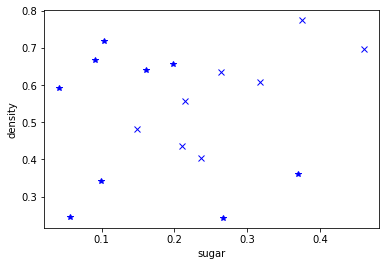

In [25]:
x_shape = np.shape(x)     #保存x的维度
pos = apple_label == 1
neg = apple_label == 0
### STARD THE CODE ###
plt.plot(x[1,pos[0,:]], x[2,pos[0,:]],'bx')
plt.plot(x[1,neg[0,:]], x[2,neg[0,:]],'b*')
### END THE CODE ###
plt.xlabel('sugar')
plt.ylabel('density')
plt.show()

输出
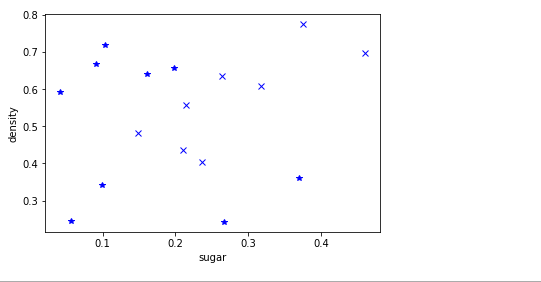

接下来开始用牛顿法计算。参数theta用0初始化，max_iter最大迭代次数为10，J用于存储每次迭代的cost。

In [26]:
theta = np.zeros([x_shape[0],1])
max_iter = 10
J = np.zeros([max_iter,1])  

下面就是用牛顿法来优化参数,定义一个sigmoid(x)函数。

In [27]:
def sigmoid(x):
    return 1.0 / (1+np.exp(-x))

任务九：利用牛顿法对参数进行更细。

接着迭代求解参数，其中参数更新方式如下：  
$$\nabla_{\theta}J={\frac{1}{m}}\sum_{i=1}^m(h_{\theta}(x^i)-y^i)x^i$$
海森矩阵的矢量式如下：
$$H=\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^i)\left(1-h_\theta(x^i)\right)x^i{(x^i)}^T\right]$$
牛顿方法更新原则：
$$\theta^{(t+1)}=\theta^{(t)}-H^{-1}\nabla_{\theta}J$$
在这里相当于求解Ax=b，求解$x=A^{-1}b$。

其中$$h_\theta(x^i)=sigmoid(x^i)$$

在下面的for循环，我们迭代max_iter次。每次将计算好的cost存储到J[i]中。    

计算$\nabla_{\theta}J$以及
$$H=\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^i)\left(1-h_\theta(x^i)\right)x^i{(x^i)}^T\right]$$  
H = (1.0/x_shape[1])*np.dot(x,np.dot(np.diag(h[:,0]),np.dot(np.diag(1-h[:,0]),x.T)))  
m = x_shape[1]

In [28]:
for i in range(max_iter): 
    z = np.dot(np.transpose(x),theta)   #参数与数据
    h = sigmoid(z)                      # 计算sigmoid（z）
    ### START THE CODE ###
    grad= np.dot(x,(h-a_label)) #计算梯度grad,也即一阶导
    Sum_H = h * (1 - h) * np.eye(len(x[0])) 
    H = np.mat(x) * Sum_H * np.mat(x.T)  #计算H
    theta -= np.linalg.inv(H) * grad #theta更新,用np.linalg.solve
    ### END THE CODE ###
    J[i]= 1.0/x_shape[1]*sum(-a_label[:,0]*np.log(h[:,0])-(1-a_label[:,0])*(np.log(1-h[:,0])));

In [29]:
print("J = ",J)
print("theta = ",theta)

J =  [[0.69314718]
 [0.52377916]
 [0.51142565]
 [0.51080603]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]]
theta =  [[-4.42886451]
 [12.52119579]
 [ 3.15832966]]


输出：  
J =  
 [[0.69314718]
 [0.52377916]
 [0.51142565]
 [0.51080603]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]
 [0.51080356]]  
 
 theta =  
 [[-4.42886451]
 [12.52119579]
 [ 3.15832966]]

**任务十：**绘制出决策边界

在利用牛顿法进行参数更新后，我们已经获得较优的解。接下来我们利用参数对数据进行划分，并绘制出划分的图像以及J[i]随着迭代次数的变化情况。

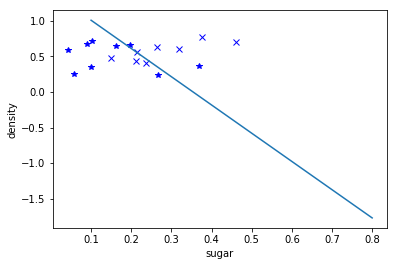

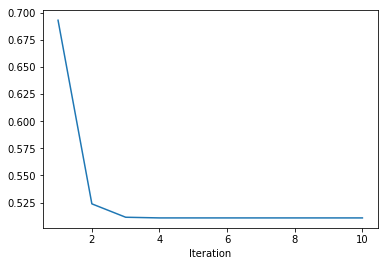

In [30]:
x_shape = np.shape(x)
pos = apple_label == 1
neg = apple_label == 0
plt.plot(x[1,pos[0,:]], x[2,pos[0,:]],'bx')
plt.plot(x[1,neg[0,:]], x[2,neg[0,:]],'b*')
plt.xlabel('sugar')
plt.ylabel('density')
### END THE CODE ###
x_pos = np.linspace(0.1,0.8,num=10)
y_pos = -(theta[0]+x_pos*theta[1])/theta[2]
plt.plot(x_pos,y_pos)

### END THE CODE ###
plt.show()
#画出J[i]随着迭代次数的变化情况
plt.plot(np.linspace(1,max_iter, max_iter),J)  
plt.xlabel('Iteration');
plt.show()

输出：  
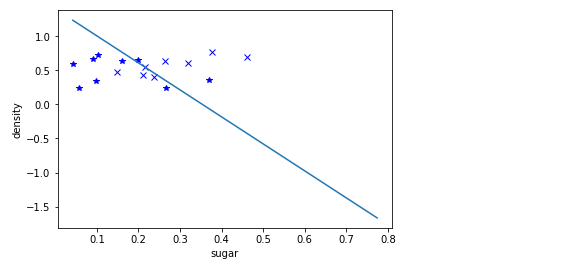

从图中可以看出，第五次迭代之后就已经达到了局部最优。牛顿法速度快，但是运算量大。

多分类与Softmax Regression  
现实中常遇到多分类学习任务，比如预测手写字体{0,1,2,3,...9}。显然二分类已经不能解决这样的问题，所以我们需要引入Softmax Regression  

Softmax Regression在logistic regression基础上，有如下条件概率分布于决策函数：
$$P\left(y=i|x,w)\right)=\frac{e^{w^Tx}}{\sum_j^Ke^{w^Tx}}$$
在上式中，j为单个分类，y为样本类别，X为特征向量，w为系数，我们的任务就是用样本数据估计w的值。  
$$\hat{y}=argmax_iP\left(y=i|x,w\right)$$

其对应的损失函数为：

$$J\left(w\right)=-\frac{1}{N}\sum_i^N\sum_j^KI\left[y_i=j\right]\log\frac{e^{w^Tx}}{\sum_j^ke^{w^Tx}}$$  
对损失函数运用梯度下降算法，得到系数矩阵w的更新方程
$$W_j = W_j + \alpha\nabla_{W_j}J(W)$$
其中$I[]$为boolean函数。
接下来我们就来实现Softmax Regression。

数据集介绍：我们的数据有两个特征，一个标签（分别为0,1,2,3）代表了不同种类。首先导入数据，数据存放在data.txt中

In [31]:
#导入需要的包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_table('data.txt',sep='\t')

In [32]:
X1 = data.iloc[:,0]   #特征向量1
X2 = data.iloc[:,1]   #特征向量2
label = data.iloc[:,2] #标签（0-3）

首先我们画出数据的分布图,不同的颜色代表不同的类别。

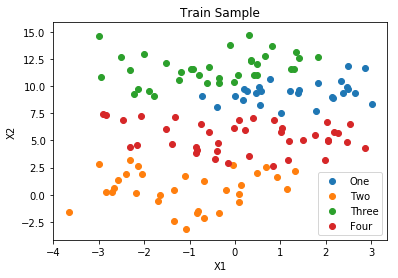

In [33]:
plt.scatter(X1[label==0],X2[label==0],label='One')
plt.scatter(X1[label==1],X2[label==1],label='Two')
plt.scatter(X1[label==2],X2[label==2],label='Three')
plt.scatter(X1[label==3],X2[label==3],label='Four')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Train Sample')
plt.show()

先对数据进行调整，将X1,X2利用np.mat变换为矩阵。label也进行相同的转换。最后在feature每一行加上一列1。
因为$$\sum_{i=0}^{n-1}\theta_i*Xi+b$$
为了表达一个整体，增加一个维度，相当于令$\theta_n=1,X_n=b$,则上式变为：
$$\sum_{i=0}^n\theta_iX_i$$

In [34]:
feature = np.mat((X1,X2)).T
label = np.mat(label).T
feature_data = np.column_stack((feature,np.ones(np.shape(feature)[0]))) #对每一行数据增加一列，且值全为1

我们了解到：
$$W = W + \alpha\nabla_{W}J(W)$$

$$ex = \frac{e^{X_iW}}{\sum_{j=1}^ne^{X_jW}}(i=,1,2...n)$$

其中矩阵表示形式为：
$$\frac{\nabla{J(W)}}{\nabla{w}} = -\frac{1}{m}\left[ex-Y\right]*X.T$$

Y为标签矩阵，如果$Y_i$为第2类，则$Y_i$ = [0,1,0,0]  
X为数据集  
m为样本数

**任务十一：**利用梯度下降法对参数进行更新，获得优化后的参数。

函数：gradient_descend  
作用：用梯度下降法对参数更新，返回优化后的参数。  
参数：  
feature_data  特征数据  
lable_data    标签数据  
k             分类数  
max_iter      最大迭代次数    
learn_rate    学习率

In [35]:
def gradient_descend(feature_data,label_data,k,max_iter,learn_rate):
    m = np.shape(feature_data)[0]                      #m为数据的行数
    n = np.shape(feature_data)[1]                      #n为数据的列数，也即种类数，在该实验为4类
    weights = np.mat(np.ones((n,k)))                   #随机初始化参数为0，维度为（n,k）,k为种类数
    i = 0                                              #初始迭代次数
    while i<max_iter:
        ex = np.exp(feature_data*weights)   #加权求和，并计算np.exp
        ### STARD THE CODE ###
        row_sum = ex.sum(axis=1)           #对每一行求和，结果赋值给row_sum
        row_sum = row_sum.repeat(k,axis=1)  #将row_sum每行扩充为k列，元素值都是原始值。   
        ex = ex/row_sum                     #计算每种种类的预测概率
        ### END THE CODE ###
        for row in range(m):                #ex = ex - Y
            ex[row,label_data[row,0]] -= 1  
        ### STARD THE CODE ###
        grad = -1 / m * feature_data.T * ex   
        weights += learn_rate * grad     #参数更新
        ### END THE CODE ###
        i += 1
    return weights

我们设置迭代次数为max_iter=50000,  
学习率为：0.2

In [36]:
w=gradient_descend(feature_data,label,4,50000,0.2)
print ("W = ", w)

W =  [[  2.5142012    0.10832354  -0.28657128   1.66404655]
 [  2.96970284  -5.00325098   5.89616895   0.13737919]
 [ -6.20702783  30.09825931 -35.51422676  15.62299528]]


输出：  
W =  [[  2.5142012    0.10832354  -0.28657128   1.66404655]
 [  2.96970284  -5.00325098   5.89616895   0.13737919]
 [ -6.20702783  30.09825931 -35.51422676  15.62299528]]

接下来我们随机生成一些数据来对我们的模型进行测试，并绘制出图像查看预测结果。

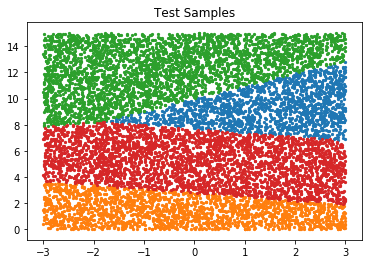

In [37]:
test_X1 = (np.random.random(10000)-0.5)*6
test_X2 = (np.random.random(10000))*15
b = np.ones(10000)
test = np.mat((test_X1,test_X2,b)).T
result = test*w
predict = result.argmax(axis=1)

merge=pd.DataFrame(np.column_stack((test,predict)))
plt.scatter(merge[merge.iloc[:,3]==0].iloc[:,0],merge[merge.iloc[:,3]==0].iloc[:,1],5)
plt.scatter(merge[merge.iloc[:,3]==1].iloc[:,0],merge[merge.iloc[:,3]==1].iloc[:,1],5)
plt.scatter(merge[merge.iloc[:,3]==2].iloc[:,0],merge[merge.iloc[:,3]==2].iloc[:,1],5)
plt.scatter(merge[merge.iloc[:,3]==3].iloc[:,0],merge[merge.iloc[:,3]==3].iloc[:,1],5)
plt.title('Test Samples')
plt.show()

可以看到我们的模型能够很好的预测出类别，祝贺成功完成本次实验。